In [ ]:
!pip install geodatasets cartopy

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from geodatasets import get_path
from google.colab import drive

drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.0 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
# key for api-conection

MAP_KEY = 'f167df68e52540cc523115c76addc481'

# now let's check how many transactions we have

url = 'https://firms.modaps.eosdis.nasa.gov/mapserver/mapkey_status/?MAP_KEY=' + MAP_KEY
try:
  df = pd.read_json(url,  typ='series')
  display(df)
except:
  # possible error, wrong MAP_KEY value, check for extra quotes, missing letters
  print ("There is an issue with the query. \nTry in your browser: %s" % url)

transaction_limit             1000
current_transactions             0
transaction_interval    10 minutes
dtype: object

In [ ]:
# let's create a simple function that tells us how many transactions we have used.

def get_transaction_count() :
  count = 0
  try:
    df = pd.read_json(url,  typ='series')
    count = df['current_transactions']
  except:
    print ("Error in our call.")
  return count

tcount = get_transaction_count()
print ('Our current transaction count is %i' % tcount)

Our current transaction count is 0


In [ ]:
# now let's see how many transactions we use by querying this end point

start_count = get_transaction_count()
pd.read_csv(da_url)
end_count = get_transaction_count()
print ('We used %i transactions.' % (end_count-start_count))

# now remember, after 10 minutes this will reset

We used 5 transactions.


<Axes: >

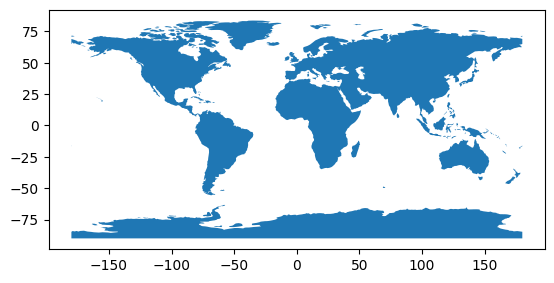

In [ ]:
# let's get our basic earth data

path = get_path("naturalearth.land")
world = geopandas.read_file(path)

# and test our libraries loaded

world.plot()

In [ ]:
# Let's see last four days MODIS data for Colombia

col_url = 'https://firms.modaps.eosdis.nasa.gov/api/country/csv/' + MAP_KEY + '/MODIS_NRT/COL/10'
df_col = pd.read_csv(col_url)

# now convert latitude, longitude values into point geometry

gdf = gpd.GeoDataFrame(
    df_col, geometry=gpd.points_from_xy(df_col.longitude, df_col.latitude), crs="EPSG:4326"
)

# show top 3 records
gdf.head(3)

,country_id,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,geometry
0,COL,3.05773,-76.45885,308.63,1.03,1.01,2023-09-29,308,Terra,MODIS,75,6.1NRT,288.63,9.85,N,POINT (-76.45885 3.05773)
1,COL,3.38199,-72.69872,302.22,1.69,1.28,2023-09-29,308,Terra,MODIS,48,6.1NRT,285.67,8.39,N,POINT (-72.69872 3.38199)
2,COL,9.72266,-75.12170,315.65,1.66,1.27,2023-09-29,1524,Terra,MODIS,42,6.1NRT,297.33,12.96,D,POINT (-75.12170 9.72266)


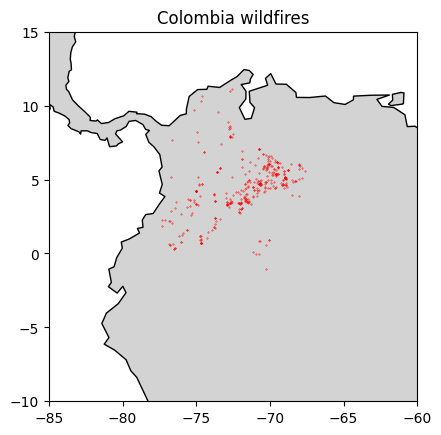

In [ ]:
# optional: set outline and fill colors

extent = [-85, -10, -60, 15]
ax = world.plot(color="lightgrey", edgecolor="black")
ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])
ax.set(title='Colombia wildfires')

# We can now plot our ``GeoDataFrame``.

gdf.plot(ax=ax, color="red", markersize=0.1)

plt.show()

In [ ]:
# set our extent

extent = [-70, -10, -60, 15]
ax = world.plot(figsize=(10, 10), color="grey", edgecolor="black")
ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])

ax.set(title='Canada wildfires July 12, 2023')

# We can now plot our ``GeoDataFrame``.

gdf.plot(ax=ax, color="red", markersize=1)

plt.show()

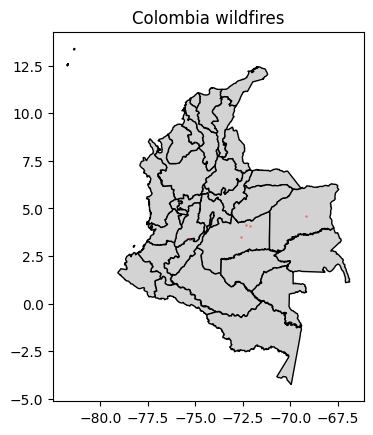

In [ ]:
# let's get our basic earth data

# Lista de valores que deseas incluir
orinoquia = ["META", "CASANARE","GUAVIARE", "VICHADA", "ARAUCA"]

# Aplicar el filtro
world = gpd.read_file("/content/drive/MyDrive/Earth_Observation/colombia.geojson")
world_filtrado = world[world["NOMBRE_DPT"].isin(orinoquia)]

days = 2

# Let's see last four days MODIS data for Colombia
col_url = 'https://firms.modaps.eosdis.nasa.gov/api/country/csv/' + MAP_KEY + f'/MODIS_NRT/COL/{days}'
df_col = pd.read_csv(col_url)

# now convert latitude, longitude values into point geometry

gdf = gpd.GeoDataFrame(
    df_col, geometry=gpd.points_from_xy(df_col.longitude, df_col.latitude), crs="EPSG:4326"
)

gdf.to_file("/content/drive/MyDrive/Earth_Observation/firms_2.geojson", driver="GeoJSON")

# optional: set outline and fill colors
ax = world.plot(color="lightgrey", edgecolor="black")
ax.set(title='Colombia wildfires')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red", markersize=0.1)

plt.show()



In [ ]:
# Cargar el GeoJSON de los polígonos de los departamentos de Colombia
departamentos_gdf = gpd.read_file("/content/drive/MyDrive/Earth_Observation/colombia.geojson")

days = 10

# Let's see last four days MODIS data for Colombia
col_url = 'https://firms.modaps.eosdis.nasa.gov/api/country/csv/' + MAP_KEY + f'/MODIS_NRT/COL/{days}'
df_col = pd.read_csv(col_url)

# now convert latitude, longitude values into point geometry
gdf_puntos = geopandas.GeoDataFrame(
    df_col, geometry=geopandas.points_from_xy(df_col.longitude, df_col.latitude), crs="EPSG:4326"
)

# Realizar una unión espacial (spatial join) entre los departamentos y los puntos
departamentos_con_puntos = gpd.sjoin(departamentos_gdf, gdf_puntos, how="inner", op="contains")

# Calcular cuántos puntos tienes por departamento
conteo_puntos_por_departamento = departamentos_con_puntos.groupby("NOMBRE_DPT").size()

# Imprimir el resultado
print(conteo_puntos_por_departamento)

NOMBRE_DPT
AMAZONAS                1
ANTIOQUIA               4
ARAUCA                 19
BOLIVAR                 1
BOYACA                  7
CAQUETA                19
CASANARE               32
CAUCA                   9
CESAR                   1
CHOCO                   1
CORDOBA                 1
CUNDINAMARCA            4
GUAINIA                 1
GUAVIARE                4
HUILA                   5
LA GUAJIRA              2
MAGDALENA               2
META                   86
NORTE DE SANTANDER     11
PUTUMAYO               10
SANTANDER               1
TOLIMA                 18
VALLE DEL CAUCA         1
VAUPES                  8
VICHADA               123
dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
